Import Data and Library for KMeans

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("Hasil_Rekap_Stock_SCMT_2024(3).csv", sep=';')

Menyeleksi features yang akan dipilih untuk analisis

In [17]:
retail_columns = [
        'Minimum Stock Requirement Retail - TOTAL',
        'Stock SCMT Retail - TOTAL'
]

premium_columns = [
        'Minimum Stock Requirement Premium - TOTAL',
        'Stock SCMT Premium - TOTAL'
]

features = retail_columns + premium_columns

print("Selected features:")
print(features)

Selected features:
['Minimum Stock Requirement Retail - TOTAL', 'Stock SCMT Retail - TOTAL', 'Minimum Stock Requirement Premium - TOTAL', 'Stock SCMT Premium - TOTAL']


Normalisasi Data

In [18]:
X = data[features].values 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Menentukan angka optimal untuk klusterisasi

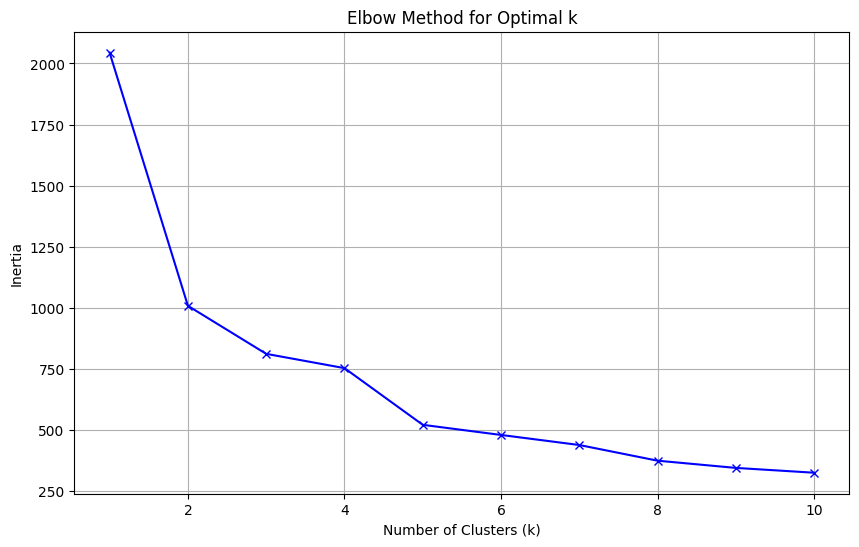

In [19]:
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Dari metode elbow diatas ditemukan bahwa angka optimal adalah 2

In [20]:
optimal_k = 2

Features Scalling

In [21]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

Memvisualisasikan penyebaran data cluster dengan menggunakan scatter plot diagram

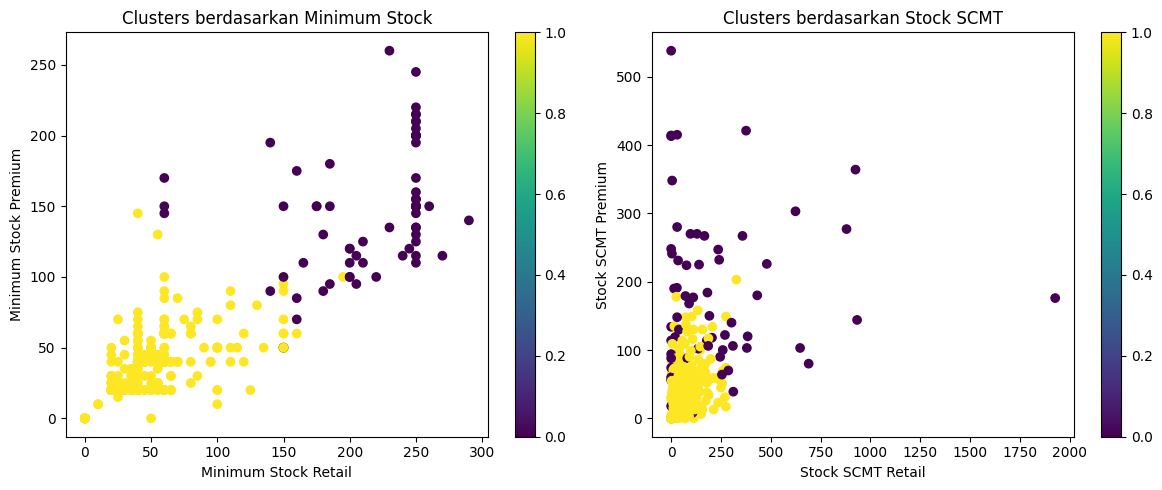

In [22]:
plt.figure(figsize=(12, 5))

# Plot untuk Minimum Stock
plt.subplot(121)
scatter = plt.scatter(X[:, 0], X[:, 2], c=cluster_labels, cmap='viridis')
plt.xlabel('Minimum Stock Retail')
plt.ylabel('Minimum Stock Premium')
plt.colorbar(scatter)
plt.title('Clusters berdasarkan Minimum Stock')
    
# Plot untuk Stock SCMT
plt.subplot(122)
scatter = plt.scatter(X[:, 1], X[:, 3], c=cluster_labels, cmap='viridis')
plt.xlabel('Stock SCMT Retail')
plt.ylabel('Stock SCMT Premium')
plt.colorbar(scatter)
plt.title('Clusters berdasarkan Stock SCMT')
    
plt.tight_layout()
plt.show()

Menganalisis kluster

In [23]:
data['Cluster'] = cluster_labels
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data[features].describe())
    print("\nWarehouses in this cluster:")
    print(cluster_data[['Warehouse'] + features + ['Cluster']])



Cluster 0:
       Minimum Stock Requirement Retail - TOTAL  Stock SCMT Retail - TOTAL  \
count                                 67.000000                  67.000000   
mean                                 214.701493                 213.701493   
std                                   50.444093                 313.853325   
min                                   60.000000                   0.000000   
25%                                  185.000000                  17.500000   
50%                                  250.000000                 107.000000   
75%                                  250.000000                 278.500000   
max                                  290.000000                1927.000000   

       Minimum Stock Requirement Premium - TOTAL  Stock SCMT Premium - TOTAL  
count                                  67.000000                   67.000000  
mean                                  147.238806                  170.641791  
std                                    43.338726

Membuat deskripsi dari hasil klusterisasi

In [24]:
cluster_descriptions = []
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    
    avg_retail = cluster_data[retail_columns].mean().mean()
    avg_premium = cluster_data[premium_columns].mean().mean()
       
    avg_min_stock_retail = cluster_data['Minimum Stock Requirement Retail - TOTAL'].mean()
    avg_stock_scmt_retail = cluster_data['Stock SCMT Retail - TOTAL'].mean()
    avg_min_stock_premium = cluster_data['Minimum Stock Requirement Premium - TOTAL'].mean()
    avg_stock_scmt_premium = cluster_data['Stock SCMT Premium - TOTAL'].mean()
        
    cluster_stats = {
    "Cluster": cluster,
    "Jumlah Data": len(cluster_data),
    "Rata-rata Retail Keseluruhan": avg_retail,
    "Rata-rata Premium Keseluruhan": avg_premium,
    "Rata-rata Minimum Stock Retail": avg_min_stock_retail,
    "Rata-rata Stock SCMT Retail": avg_stock_scmt_retail,
    "Rata-rata Minimum Stock Premium": avg_min_stock_premium,
    "Rata-rata Stock SCMT Premium": avg_stock_scmt_premium
    }
    
    cluster_descriptions.append(cluster_stats)

    print("\nDeskripsi Cluster:")
    for cluster_info in cluster_descriptions:
        print(f"Cluster {cluster_info['Cluster']}:")
        print(f"Jumlah data dalam cluster: {cluster_info['Jumlah Data']}")
        print(f"Rata-rata Retail Keseluruhan: {cluster_info['Rata-rata Retail Keseluruhan']:.2f}")
        print(f"Rata-rata Premium Keseluruhan: {cluster_info['Rata-rata Premium Keseluruhan']:.2f}")
        print(f"Rata-rata Minimum Stock Retail: {cluster_info['Rata-rata Minimum Stock Retail']:.2f}")
        print(f"Rata-rata Stock SCMT Retail: {cluster_info['Rata-rata Stock SCMT Retail']:.2f}")
        print(f"Rata-rata Minimum Stock Premium: {cluster_info['Rata-rata Minimum Stock Premium']:.2f}")
        print(f"Rata-rata Stock SCMT Premium: {cluster_info['Rata-rata Stock SCMT Premium']:.2f}")
        print("\n")

    print("Distribusi Jumlah Data per Cluster:")
    print(data['Cluster'].value_counts().sort_index())


Deskripsi Cluster:
Cluster 0:
Jumlah data dalam cluster: 67
Rata-rata Retail Keseluruhan: 214.20
Rata-rata Premium Keseluruhan: 158.94
Rata-rata Minimum Stock Retail: 214.70
Rata-rata Stock SCMT Retail: 213.70
Rata-rata Minimum Stock Premium: 147.24
Rata-rata Stock SCMT Premium: 170.64


Distribusi Jumlah Data per Cluster:
Cluster
0     67
1    444
Name: count, dtype: int64

Deskripsi Cluster:
Cluster 0:
Jumlah data dalam cluster: 67
Rata-rata Retail Keseluruhan: 214.20
Rata-rata Premium Keseluruhan: 158.94
Rata-rata Minimum Stock Retail: 214.70
Rata-rata Stock SCMT Retail: 213.70
Rata-rata Minimum Stock Premium: 147.24
Rata-rata Stock SCMT Premium: 170.64


Cluster 1:
Jumlah data dalam cluster: 444
Rata-rata Retail Keseluruhan: 51.10
Rata-rata Premium Keseluruhan: 35.58
Rata-rata Minimum Stock Retail: 47.44
Rata-rata Stock SCMT Retail: 54.76
Rata-rata Minimum Stock Premium: 35.26
Rata-rata Stock SCMT Premium: 35.91


Distribusi Jumlah Data per Cluster:
Cluster
0     67
1    444
Name:

Hasil klusterisasi warehouse berdasarkan kluster

In [25]:
for i in range(optimal_k):
        cluster_points = X_scaled[cluster_labels == i]
        cluster_warehouses = data['Warehouse'][cluster_labels == i].values
        print(f"\nCluster {i}:")
        print("Warehouses dalam cluster ini:")
        for warehouse in cluster_warehouses:
            print(f"  - {warehouse}")


Cluster 0:
Warehouses dalam cluster ini:
  - TA WITEL CCAN JAMBI WH
  - TA WITEL CCAN LAMPUNG (BANDAR LAMPUNG) WH
  - TA WITEL CCAN NAD (ACEH) WH
  - TA WITEL CCAN RIAU DARATAN (PEKANBARU) WH
  - TA WITEL CCAN SUMATERA BARAT (PADANG) WH
  - TA WITEL CCAN SUMATERA SELATAN (PALEMBANG) WH
  - TA WITEL CCAN SUMUT BARAT (MEDAN) WH
  - TA WITEL CCAN SUMUT TIMUR (PEMATANG SIANTAR) WH
  - TA WITEL CCAN JABAR BARAT UTARA (BEKASI) WH
  - TA WITEL CCAN JABAR BARAT (BOGOR) WH
  - TA WITEL CCAN JAKARTA BARAT WH
  - TA WITEL CCAN JAKARTA PUSAT WH
  - TA SO CCAN CEMPAKA PUTIH WH
  - TA WITEL CCAN JAKARTA SELATAN WH
  - TA WITEL CCAN JAKARTA TIMUR WH
  - TA WITEL CCAN JAKARTA UTARA WH
  - TA WITEL CCAN BANTEN BARAT (SERANG) WH
  - TA SO CCAN SERANG WH
  - TA WITEL CCAN BANTEN TIMUR (TANGERANG) WH
  - TA SO CCAN CIPUTAT WH
  - TA WITEL CCAN JABAR SELATAN (SUKABUMI) WH
  - TA WITEL CCAN JABAR TENGAH (BANDUNG) WH
  - TA SO CCAN BANDUNG CENTRUM WH
  - TA WITEL CCAN JABAR TIMUR (CIREBON) WH
  - TA WITEL C